# Importing libraries & dataframe reading

In [1]:
'''
Name: Munis Mamwn Alawneh
Student No.:163323

'''

import pandas as pd 
import numpy as np  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


np.random.seed(42)  # Setting the seed for reproducibility
    

In [2]:
PATHtr = '/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv'

df = pd.read_csv(PATHtr)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
0,0.00,0.00,1.12,0.0,0.56,0.00,0.00,0.00,0.00,0.56,...,0.101,0.00,0.606,0.000,0.000,2.360,19,144,1,29
1,0.32,0.00,0.64,0.0,0.32,0.32,0.00,1.61,0.32,0.64,...,0.160,0.00,1.178,0.107,0.000,3.613,63,318,1,3792
2,0.00,0.00,0.00,0.0,0.34,0.00,0.00,0.34,0.00,1.70,...,0.055,0.11,0.000,0.000,0.000,1.421,8,91,0,1317
3,0.19,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.108,0.00,0.000,0.108,0.000,2.634,23,303,0,3309
4,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.746,0.00,0.000,0.000,0.000,1.687,4,27,0,3342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,0.00,0.00,4.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,0.613,0.000,0.000,1.000,1,14,0,1105
3216,0.00,0.00,0.00,0.0,4.16,0.00,0.00,0.00,0.00,0.00,...,0.689,0.00,0.689,0.000,0.000,1.300,4,13,0,4440
3217,0.00,0.00,0.00,0.0,1.11,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,0.784,0.000,0.000,5.687,39,91,1,51
3218,0.00,0.57,0.57,0.0,1.14,0.57,2.28,0.00,0.00,0.57,...,0.081,0.00,0.487,0.000,0.081,16.217,147,373,1,2189


In [3]:
PATHts = '/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv'

test_df = pd.read_csv(PATHts)
test_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ID
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.470,5,25,1981
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.555,3.000,14,348,1940
2,0.00,0.00,0.00,0.00,0.53,0.00,0.00,0.26,0.00,0.00,...,0.000,0.000,0.000,0.555,0.000,1.157,19.260,107,886,4260
3,0.09,0.19,0.98,0.00,0.78,0.78,0.49,0.00,0.78,0.19,...,0.000,0.102,0.000,0.393,0.145,0.014,8.323,669,1415,3200
4,0.00,0.42,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.075,0.000,0.600,0.300,0.000,4.020,82,197,3082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,0.00,0.00,0.00,0.00,0.00,0.00,1.04,0.00,0.00,0.00,...,0.062,0.248,0.000,0.621,0.062,0.062,3.902,59,160,2757
1377,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.098,0.000,0.098,0.000,0.000,1.627,15,70,1986
1378,0.05,0.00,0.05,0.00,0.30,0.00,0.00,0.00,0.51,0.00,...,0.209,0.158,0.050,0.000,0.014,0.000,3.764,85,1423,2972
1379,0.64,0.00,0.25,0.00,0.00,0.38,0.00,0.00,0.00,0.25,...,0.000,0.161,0.000,1.082,0.299,0.092,5.274,146,981,3568


In [4]:
X = df.drop(columns=['spam', 'ID'], axis=1)  # Dropping the 'spam' and 'ID' columns from the features
y = df.spam  

Xt = test_df.drop(columns=['ID'], axis=1)

# Splitting the data into 0.9 training and 0.1 validation
X_tra, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_tra.shape

(2898, 57)

# Data preprocessing

## Training and validation data scaling

In [5]:
# Create an instance of StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_tra)

X_val_scaled = scaler.transform(X_val)
X_train_scaled.shape

(2898, 57)

## Full data scaling

In [6]:
scaler2 = StandardScaler()

X_train = scaler2.fit_transform(X)


X_test = scaler2.transform(Xt)
X_train.shape

(3220, 57)

# Default model training for feature importance extraction

In [7]:
rf_model = RandomForestClassifier(random_state=42)


rf_model.fit(X_train_scaled, y_train)


feature_importances = rf_model.feature_importances_


## Feature importance  

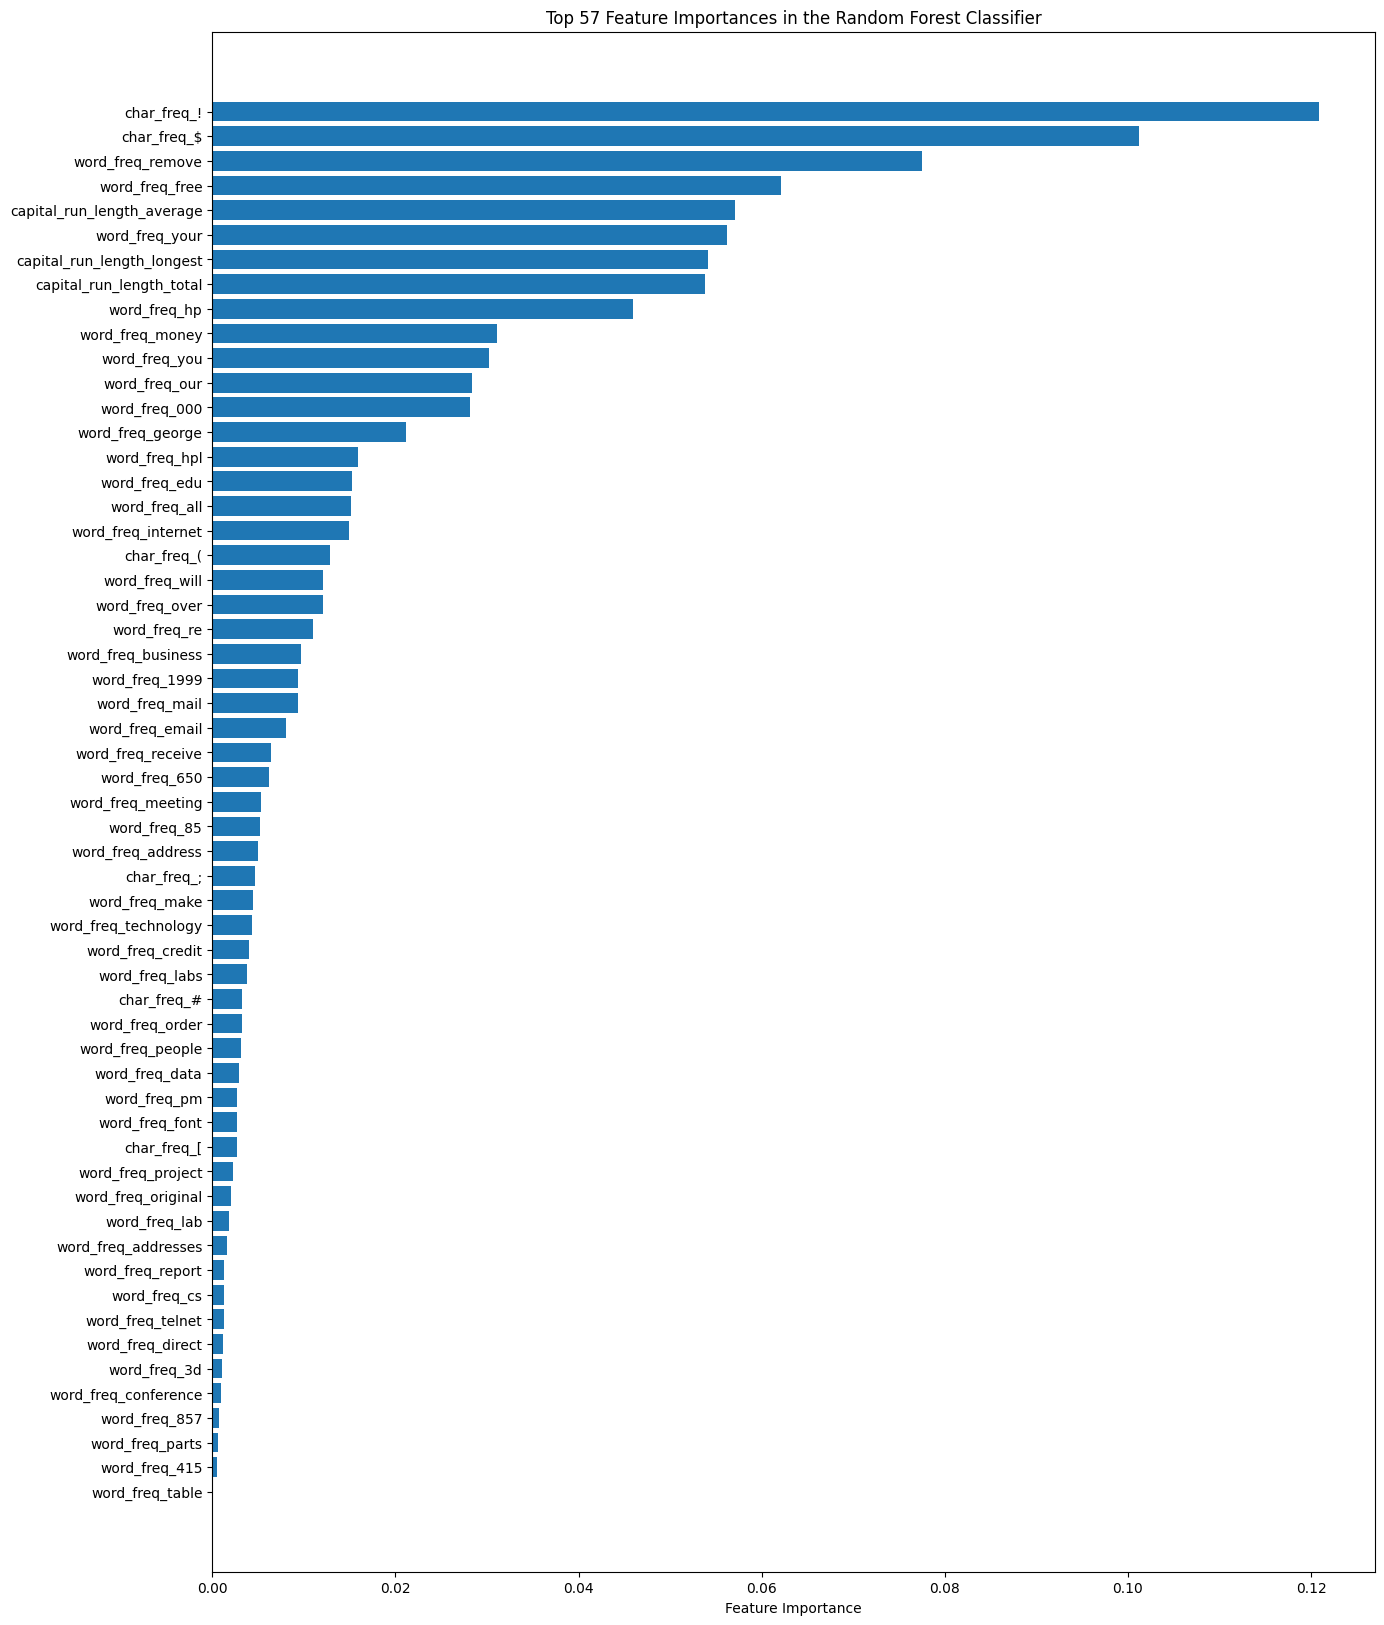

In [8]:
# This plot here helps visualizing the importance of each feature helps to understand 
# which features are contributing the most to the predictions. 

feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_sorted_indices = sorted_indices[:]
top_features_names = X.columns[top_sorted_indices]

plt.figure(figsize=(15, 20))
plt.barh(range(len(top_features_names)), feature_importances[top_sorted_indices], align='center')
plt.yticks(range(len(top_features_names)), top_features_names)
plt.xlabel('Feature Importance')
plt.title('Top 57 Feature Importances in the Random Forest Classifier')
plt.gca().invert_yaxis() 
plt.show()


# Data slicing depending on the selected features 

## Slicing the validation data

In [9]:
# Define the number of top features to select to reduce overfitting
num_top_features = 54

top_feature_indices = np.argsort(feature_importances)[::-1][:num_top_features]

selected_features = X.columns[top_feature_indices]

X_train_selected = X_train_scaled[:, top_feature_indices] 
X_val_selected = X_val_scaled[:, top_feature_indices]    

X_train_selected.shape

(2898, 54)

## Slicing the testing data

In [10]:
X_train_s = X_train[:, top_feature_indices] 
X_test_s = X_test[:, top_feature_indices]    

X_test_s.shape

(1381, 54)

# Setting up GS parameteres

In [11]:
# Define the parameter grid for hyperparameter tuning using GridSearchCV
# Note that these are the final values after running too many iterations


param_grid = {
    'n_estimators': [200],           
    'max_features': ['log2'],        
    'criterion': ['entropy'],        
    'max_depth': [30],               
    'bootstrap': [False],            
    'warm_start': [True],            
    'min_samples_split': [5],        
    'min_samples_leaf': [1],       
}

# Grid search and training

## Grid search on a subset of the training data to acquire the best parameters

In [12]:
rf = RandomForestClassifier(random_state=42)


# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=rf,                   
    param_grid=param_grid,          
    cv=5,                           
    scoring='f1',                   
    n_jobs=-1,                      
    verbose=2                       
)

# Fit GridSearchCV to the training data with the selected features
grid_search.fit(X_train_selected, y_train)


# Extract the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


# Create a new instance of the RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(random_state=42, **best_params)


rf_best.fit(X_train_selected, y_train)


y_val_pred = rf_best.predict(X_val_selected)


f1 = f1_score(y_val, y_val_pred)
print("Validation F1 Score with Best Parameters:", f1)

# Print the top F1 score obtained so far
# TOP RESULT TILL NOW: 0.962121212121212


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'warm_start': True}
Validation F1 Score with Best Parameters: 0.9581749049429658


## Training on the full data

# Confusion matrix

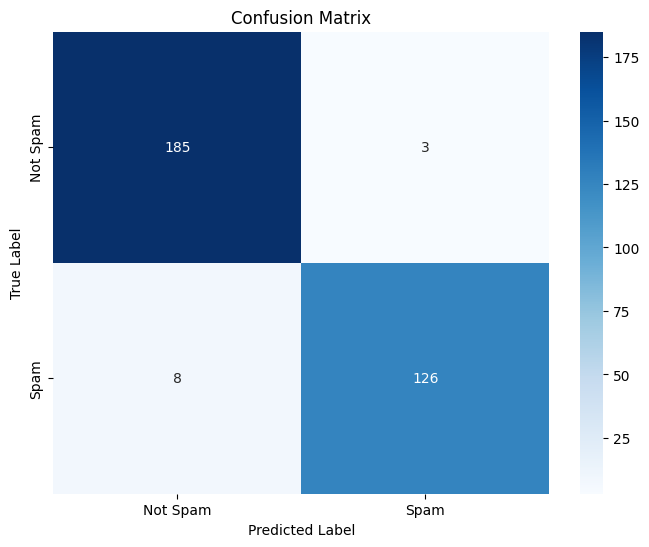

In [13]:
# Here is the confusion matrix that summarizes my results

conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# distribution of predicted probabilities

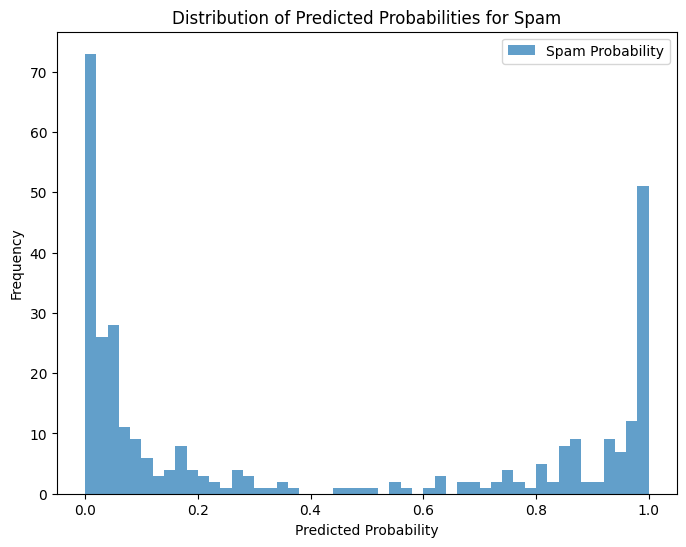

In [14]:
y_proba = rf_best.predict_proba(X_val_selected)[:, 1]  # Probabilities for the positive class (spam)

# Plot the histogram of predicted probabilities
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(y_proba, bins=50, alpha=0.7, label='Spam Probability')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities for Spam')
plt.legend()
plt.show()

# Loading the results on a CSV file for submission

In [15]:
rf_best.fit(X_train_s, y)

print("Fitting done!!")

rf_pred = rf_best.predict(X_test_s)

# Create a DataFrame containing the predictions along with the corresponding IDs
output = pd.DataFrame({'ID': test_df.ID, 'spam': rf_pred})

# Write the predictions to a CSV file named 'predictions.csv' without including the index
output.to_csv('predictions.csv', index=False)


Fitting done!!
